# Jersey Bikes: Will It Slide? (TBD)

*Citibike* started in 2013, first in New York City.  After several years, they expanded to Jersey City.  This year, *Citibike* expanded 15 ports and it is time to explore the data!  Let's learn more about how CitiBike has done after being in service.  

## Proposal
### citibike

###  aim


## Start
### Dataset

The CitiBike dataset is downloaded from their [Systems Data](https://www.citibikenyc.com/system-data) section.  Below is the "starting" sequence, a series of codes for us to work with as we continue.  Please note this is for the exploratory data analysis portion.  Other Python packages will download when needed.

In [295]:
import glob

In [296]:
# Get file names
files = glob.glob('*.csv')

import pandas as pd

# Loop through file names and read the data
dfs = []

for file in files:
    print('Reading ' + file)
    newset = pd.read_csv(file)
    if dfs == []:
        newcol = newset.columns
    else:
        newset.columns = newcol
    dfs.append(newset)

Reading 201608-citibike-tripdata.csv
Reading 201610-citibike-tripdata.csv


In [297]:
dfs[0].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,288,8/1/2016 00:01:22,8/1/2016 00:06:11,302,Avenue D & E 3 St,41,-74,428,E 3 St & 1 Ave,41,-74,16920,Subscriber,1961,1
1,457,8/1/2016 00:01:43,8/1/2016 00:09:21,285,Broadway & E 14 St,41,-74,432,E 7 St & Avenue A,41,-74,20084,Subscriber,1989,2
2,278,8/1/2016 00:02:10,8/1/2016 00:06:49,539,Metropolitan Ave & Bedford Ave,41,-74,3096,Union Ave & N 12 St,41,-74,18380,Subscriber,1971,1
3,862,8/1/2016 00:02:13,8/1/2016 00:16:36,280,E 10 St & 5 Ave,41,-74,280,E 10 St & 5 Ave,41,-74,24101,Subscriber,1995,1
4,407,8/1/2016 00:02:21,8/1/2016 00:09:09,161,LaGuardia Pl & W 3 St,41,-74,428,E 3 St & 1 Ave,41,-74,18949,Subscriber,1993,1


Right now (09/19/17), two datasets merged to the list `dfs`, August 2016 and October 2016.  A data wrangling issue addressed at initiation is the header (i.e. attribute names).  Citibike may have changed the header names.  This may cause inconsistency.  So it's important that they are the same.  After dealing with headers, the data divides into five specific 'groups':

* Trip (tripduration, start time, stop time)
* Origin (station id, name, coordinates)
* Destination (station id, name, coordinates)
* Customer (type, birthyear, gender)
* Bike (bike id)

This doesn't include other factors (i.e. biketype, speed) and external attributes (i.e. weather, events).  However, that doesn't mean the project will use the entire dataset.  Coordinates is a perfect example, as they work best with mapping.  This project will not explore mapping.

Each attribute is below; keep in mind:

* Trip Duration (seconds)
* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
* Gender (0=unknown; 1=male; 2=female)


In [298]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557663 entries, 0 to 1557662
Data columns (total 15 columns):
tripduration               1557663 non-null int64
starttime                  1557663 non-null object
stoptime                   1557663 non-null object
start station id           1557663 non-null int64
start station name         1557663 non-null object
start station latitude     1557663 non-null float64
start station longitude    1557663 non-null float64
end station id             1557663 non-null int64
end station name           1557663 non-null object
end station latitude       1557663 non-null float64
end station longitude      1557663 non-null float64
bikeid                     1557663 non-null int64
usertype                   1557663 non-null object
birth year                 1343039 non-null float64
gender                     1557663 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 178.3+ MB


### Data Wrangling
Create a short document (1-2 pages) in your github describing the data wrangling steps that you undertook to clean your capstone project data set. 

* What kind of cleaning steps did you perform? 
* How did you deal with missing values, if any? 
* Were there outliers, and how did you decide to handle them? 

This document will eventually become part of your milestone report.

#### Reviewing Dataset
Several issues arise:

* Improper headers (`Trip Duration` for 10/16 vs `tripduration` 08/16)*
* Improper birth year format (minor but still there)
* Missing customer details (i.e. subscribers have birth year and gender, customers don't)
* Improper datetime formats (`8/1/2016 00:01:22` vs `2016-10-01 00:00:07`)

NOTE: Improper headers were resolved by using the first set's header when initializing the dataset.  If there were changes, i.e. new column, then further work would be done to deal with missing values from previous sets and work with future sets.  Here this is not the case, but having consistent headers is beneficial.  

So let's deal with the dataset issues.

#### Birth Year
This is a simple conversion to format the float.  

In [300]:
# Birth Year
pd.options.display.float_format = '{:.0f}'.format
dfs[0].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,288,8/1/2016 00:01:22,8/1/2016 00:06:11,302,Avenue D & E 3 St,41,-74,428,E 3 St & 1 Ave,41,-74,16920,Subscriber,1961,1
1,457,8/1/2016 00:01:43,8/1/2016 00:09:21,285,Broadway & E 14 St,41,-74,432,E 7 St & Avenue A,41,-74,20084,Subscriber,1989,2
2,278,8/1/2016 00:02:10,8/1/2016 00:06:49,539,Metropolitan Ave & Bedford Ave,41,-74,3096,Union Ave & N 12 St,41,-74,18380,Subscriber,1971,1
3,862,8/1/2016 00:02:13,8/1/2016 00:16:36,280,E 10 St & 5 Ave,41,-74,280,E 10 St & 5 Ave,41,-74,24101,Subscriber,1995,1
4,407,8/1/2016 00:02:21,8/1/2016 00:09:09,161,LaGuardia Pl & W 3 St,41,-74,428,E 3 St & 1 Ave,41,-74,18949,Subscriber,1993,1


#### Datetime
This is tricky as some datasets have the date format differently than another.  

In [301]:
# Merge two lists together after finalizing date
df = pd.concat(dfs)

In [302]:
# drop any duplicates in the data
df = df.drop_duplicates()

In [303]:
# Datetime 
df['starttime'] = pd.to_datetime(df['starttime'])

In [304]:
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [261]:
# show datetime64[ns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3131535 entries, 0 to 1573871
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
dtypes: datetime64[ns](2), float64(5), int64(5), object(3)
memory usage: 382.3+ MB


#### Missing Data
First, which data is missing?  Missing data is identified as '' or `NaN`.  Luckily no missing data for times exist.

In [262]:
df.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                    17949
birth year                 382072
gender                          0
dtype: int64

The attributes `usertype` and `birth year` show a lot of missing data. `birth year` is the most important as this is what the analysis will be working with.  We'll perform two paths:

* Drop all unnecessary values from the dataset: df_clean
* Clean the data with estimations (i.e. no `birth year` and `usertype` = customer)

In [263]:
# Drop NA subset
df_clean = df.dropna()
df_clean.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

Using `dropna()` removes all data that has a `NaN` influence.  However, this is nearly 400,000 cells and is not best.  So let's dive deeper by selecting conditions.  An estimate shows that if the bike year is not available, it is a customer.  However, if a birth year is shown next to people who are unidentified, they are probably a customer.  Citibike does not require customers to provide their birth year when purchasing for 3 days (credit cards are a different story).  

In [264]:
# Fill those with no usertype & birth year as 'customer
df['usertype'].value_counts()

Subscriber    2742004
Customer       371582
Name: usertype, dtype: int64

In [265]:
dfc = (df['birth year'].isnull() & df['usertype'].isnull()) ## Customers

In [266]:
dfs = (df['birth year'].notnull() & df['usertype'].isnull()) ## Subscribers

In [330]:
#qount = 0
#count = 0

for i, row in df.iterrows():
    if pd.isnull(row['usertype']):
        if pd.isnull(row['birth year']):
            row['usertype'] = 'Customer'
            #count = count + 1
        else:
            row['usertype'] = 'Subscriber'
            #qount = qount + 1

In [331]:
count

23

In [332]:
qount

17926

#### Outliers
Here, outliers are common.  They will involve birth year, gender, and user type.  Because trip duration is a measure, it is worth exploring, especially if the data has no-trips (i.e. trips where a user took out and returned the bike in less than a minute) or obscured trips (i.e. taken out for a prolonged time).  

In [267]:
# Trip duration is an actual measure, below shows the stats.  
# Significant trips (25% - 75%) are between 394 sec (~6 min) to 656 sec (~11 min).
# Notice max trip duration is ~9M seconds (103 days)
# Outliers will be explored later in document

df['tripduration'].describe()

count   3131535
mean        953
std       12110
min          61
25%         394
50%         656
75%        1116
max     8933552
Name: tripduration, dtype: float64

In [268]:
# One outlier type (via tripduration) shows 479 entries having a trip over 1 day
df[df['tripduration'] > (24 * 60 * 60)].shape

(479, 15)

In [270]:
# Another outlier type shows 34k trips with less than 2 minute (decide to keep or remove)
df[df['tripduration'] <= 120].shape

(34211, 15)

In [289]:
# As for birth year, notice how long the birth year gap is 
df['birth year'].describe()

count   2749463
mean       1978
std          12
min        1885
25%        1970
50%        1981
75%        1987
max        2000
Name: birth year, dtype: float64

In [290]:
# Using 1930 (age 87) as a threshold, shows size with very old age, questionable for outliers
df[df['birth year'] < 1930.0].shape

(1261, 15)

In [320]:
# This will look at the spread of all participants
# 1 = male, 2 = female, 0 = unknown
df['gender'].value_counts()

1    2044462
2     696621
0     390452
Name: gender, dtype: int64

In [346]:
# Unknown gender types (for this dataset, it's near 400,000 records)
df[df['gender'] == 0].shape

(390452, 15)

In [340]:
# Problem running with this
df[df['gender']==0 & df['usertype']=='Customer']

SyntaxError: invalid syntax (<ipython-input-340-18588c7a1f2d>, line 1)

## Exploratory Data Storytelling
Pick a dataset (ideally the dataset for your Capstone). If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

Get going by asking the following questions and looking for the answers with some code and plots:
* Can you count something interesting?
* Can you find some trends (high, low, increase, decrease, anomalies)?
* Can you make a bar plot or a histogram?
* Can you compare two related quantities?
* Can you make a scatterplot?
* Can you make a time-series plot?

Having made these plots, what are some insights you get from them? 
* Do you see any correlations? 
* Is there a hypothesis you would like to investigate further? 
* What other questions do they lead you to ask?

By now you’ve asked a bunch of questions, and found some neat insights. 
* Is there an interesting narrative that tells a compelling story? 
* What are some other trends/relationships you think will make it more complete?

Submission Requirements: The notebook should contain:

* The questions you asked
* The trends you investigated
* The resulting visualizations and conclusions.

If the data set is too large to commit, please include a link to the data set inside the Jupyter notebook.

### Exploring All Variables with Age
Because of the year variable is an interest, this will focus on the interactions the attribute `year` has on other variables.  This will help lead to a story that may reflect the true nature of the dataset!

In [282]:
# As for birth year, notice how long the birth year gap is
df['birth year'].value_counts()

1985    119571
1989    118151
1988    117898
1986    117742
1987    113655
1984    111576
1990    109628
1983    105484
1982     94598
1991     93301
1981     90740
1992     82435
1980     80466
1979     72977
1978     67740
1977     65576
1976     61912
1970     60869
1993     59446
1974     58294
1975     56162
1971     54526
1969     54118
1972     53782
1973     52402
1968     47372
1967     43965
1965     41548
1964     41173
1966     41111
         ...  
1938       620
1900       370
1939       271
1885       184
1936       179
1937       148
1932       119
1934       118
1935       110
1901       100
1899        99
1933        76
1910        68
1921        67
1917        62
1888        60
1926        56
1923        46
1918        40
1912        31
1886        16
1930        15
1920        15
1913        12
1895        12
1896        10
1931         8
1907         5
1894         5
1893         3
Name: birth year, Length: 91, dtype: int64

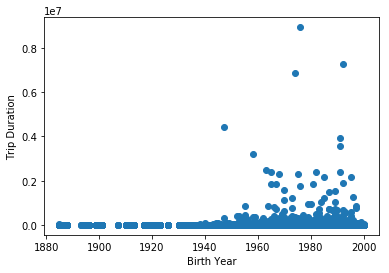

In [274]:
import matplotlib.pyplot as plt

# Comparing birth year to trip duration
plt.scatter(df['birth year'], df['tripduration'])
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration')
plt.show()

In [ ]:
# 


## References
1. Silva, Luis Vale.  "Exploring NYC's Citbike: Or How to Make Interactive Maps with Python and Folium." *Data Simple.* Start 11/01/2015. Access 09/01/2017. URL: http://luisvalesilva.com/datasimple/citibike.html
2. Jake VanderPlas.  "Analyzing Pronto Cycleshare Data with Python and Pandas."  *Pythonic Perambulations.* Start 10/17/2015.  Access 09/09/2017. URL: https://jakevdp.github.io/blog/2015/10/17/analyzing-pronto-cycleshare-data-with-python-and-pandas/

In [291]:
# organize year by age group
# age group vs count(trips): gender
# age group by count(trips): subscribers

# 3D contour time vs age group vs count
# hypothesis